#**Task 2.6

In [222]:
#!nvidia-smi -L

In [223]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [224]:
test = pd.read_csv("/content/test (1).csv")
train = pd.read_csv("/content/train (1).csv")

In [225]:
train.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_22, *['Store'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_23, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_24, *['Customers'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_25, *['Store'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_26, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_27, *['Customers'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_28, *[[['Store', 'Sales'], ['Sales', 'Customers']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_29, *['Store', 'Sales', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_30, *['Store', 'Customers', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_31, *['Store', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_32, *['DayOfWeek', 'Sales', None], **{})
chart

In [226]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_33, *['Store'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_34, *['DayOfWeek'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_35, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_36, *['Customers'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_37, *['Store'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_38, *['DayOfWeek'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_39, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_40, *['Customers'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_41, *[[['Store', 'DayOfWeek'], ['DayOfWeek', 'Sales'], ['Sales', 'Customers'], ['Customers', 'Open']]], **{})
chart

In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [228]:
class MissingFinder:
    def calculate_missing_percentage(self, df: pd.DataFrame) -> float:
        # Calculate the total number of cells in the DataFrame
        total_cells = np.product(df.shape)

        # Calculate the count of missing values for each column
        missing_count = df.isnull().sum()

        # Calculate the total count of missing values in the DataFrame
        total_missing = missing_count.sum()

        # Calculate and return the percentage of missing values rounded to two decimal places
        missing_percentage = (total_missing / total_cells) * 100
        return round(missing_percentage, 2)

# Create an instance of the MissingFinder class
missing_finder = MissingFinder()

# Calculate the missing percentage for the 'train' DataFrame
missing_percentage = missing_finder.calculate_missing_percentage(train)

# Print the missing percentage
print(f"Missing Percentage: {missing_percentage}%")


Missing Percentage: 0.0%


In [229]:
from sklearn.preprocessing import MinMaxScaler
import warnings

class DataProcessor:
    def __init__(self):
        self.missing_finder = MissingFinder()  # Assuming MissingFinder class is defined as in your original code

    # Function to extract the "Date" and "Sales" columns from the DataFrame
    def extract_date_and_sales(self, df):
        return df[["Date", "Sales"]]

    # Function to filter out closed stores
    def filter_open_stores(self, df):
        df = df[df['Open'] == 1]
        return df

    # Function to scale the "Sales" column using Min-Max scaling
    def scale_sales(self, df):
        scaler = MinMaxScaler()
        scaled_sales = scaler.fit_transform(df[["Sales"]])
        df["scaled_sales"] = scaled_sales
        return df

    # Function to handle outliers in the "Sales" column using the IQR method
    def handle_outliers(self, df, col):
        df = df.copy()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        return df

    # Process the data using all the steps
    def process_data(self, train):
        # Assuming 'train' is your DataFrame with the "Sales" column
        train["Sales"] = train["Sales"].astype("float")

        # Extract relevant features
        data = self.filter_open_stores(train)
        data = self.extract_date_and_sales(data)

        # Handle outliers in the "Sales" column
        data = self.handle_outliers(data, "Sales")

        # Group by "Date" and calculate the mean of "Sales"
        data_agg = data.groupby("Date").agg({"Sales": "mean"})

        # Calculate the missing percentage using the MissingFinder class
        missing_percentage = self.missing_finder.calculate_missing_percentage(data_agg)

        # Print the missing percentage
        print(f"Missing Percentage in Aggregated Sales Data: {missing_percentage}%")

# Instantiate the DataProcessor class
data_processor = DataProcessor()

# Call the process_data method with your 'train' DataFrame
data_processor.process_data(train)


Missing Percentage in Aggregated Sales Data: 0.0%


In [230]:
class DataProcessor:
    def __init__(self):
        self.missing_finder = MissingFinder()  # Assuming MissingFinder class is defined as in your original code

    def extract_date_and_sales(self, df):
        return df[["Date", "Sales"]]

    def filter_open_stores(self, df):
        df = df[df['Open'] == 1]
        return df

    def scale_sales(self, df):
        scaler = MinMaxScaler()
        scaled_sales = scaler.fit_transform(df[["Sales"]])
        df["scaled_sales"] = scaled_sales
        return df

    def handle_outliers(self, df, col):
        df = df.copy()
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)

        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

        return df

    def process_data(self, train):
        train["Sales"] = train["Sales"].astype("float")
        data = self.filter_open_stores(train)
        data = self.extract_date_and_sales(data)
        data = self.handle_outliers(data, "Sales")
        data_agg = data.groupby("Date").agg({"Sales": "mean"})
        missing_percentage = self.missing_finder.calculate_missing_percentage(data_agg)
        print(f"Missing Percentage in Aggregated Sales Data: {missing_percentage}%")
        return data_agg

# Instantiate the DataProcessor class
data_processor = DataProcessor()

# Call the process_data method with your 'train' DataFrame and store the result
data_agg = data_processor.process_data(train)

# Display the first few rows of the aggregated data
if data_agg is not None:
    print(data_agg.head())
else:
    print("Data aggregation failed.")


Missing Percentage in Aggregated Sales Data: 0.0%
                  Sales
Date                   
2013-01-01  5504.676471
2013-01-02  6193.011701
2013-01-03  5686.321912
2013-01-04  5955.507671
2013-01-05  5330.833333


In [231]:
data_agg.head()

,Sales
Date,
2013-01-01,5504.676471
2013-01-02,6193.011701
2013-01-03,5686.321912
2013-01-04,5955.507671
2013-01-05,5330.833333


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_42, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_43, *['Sales'], **{})
chart

In [232]:
data_agg.describe()

,Sales
count,942.000000
mean,6988.142162
std,1475.510458
min,4057.782960
25%,5725.756766
50%,6822.535825
75%,7778.867102
max,11908.661883


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_44, *['Sales'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_45, *['Sales'], **{})
chart

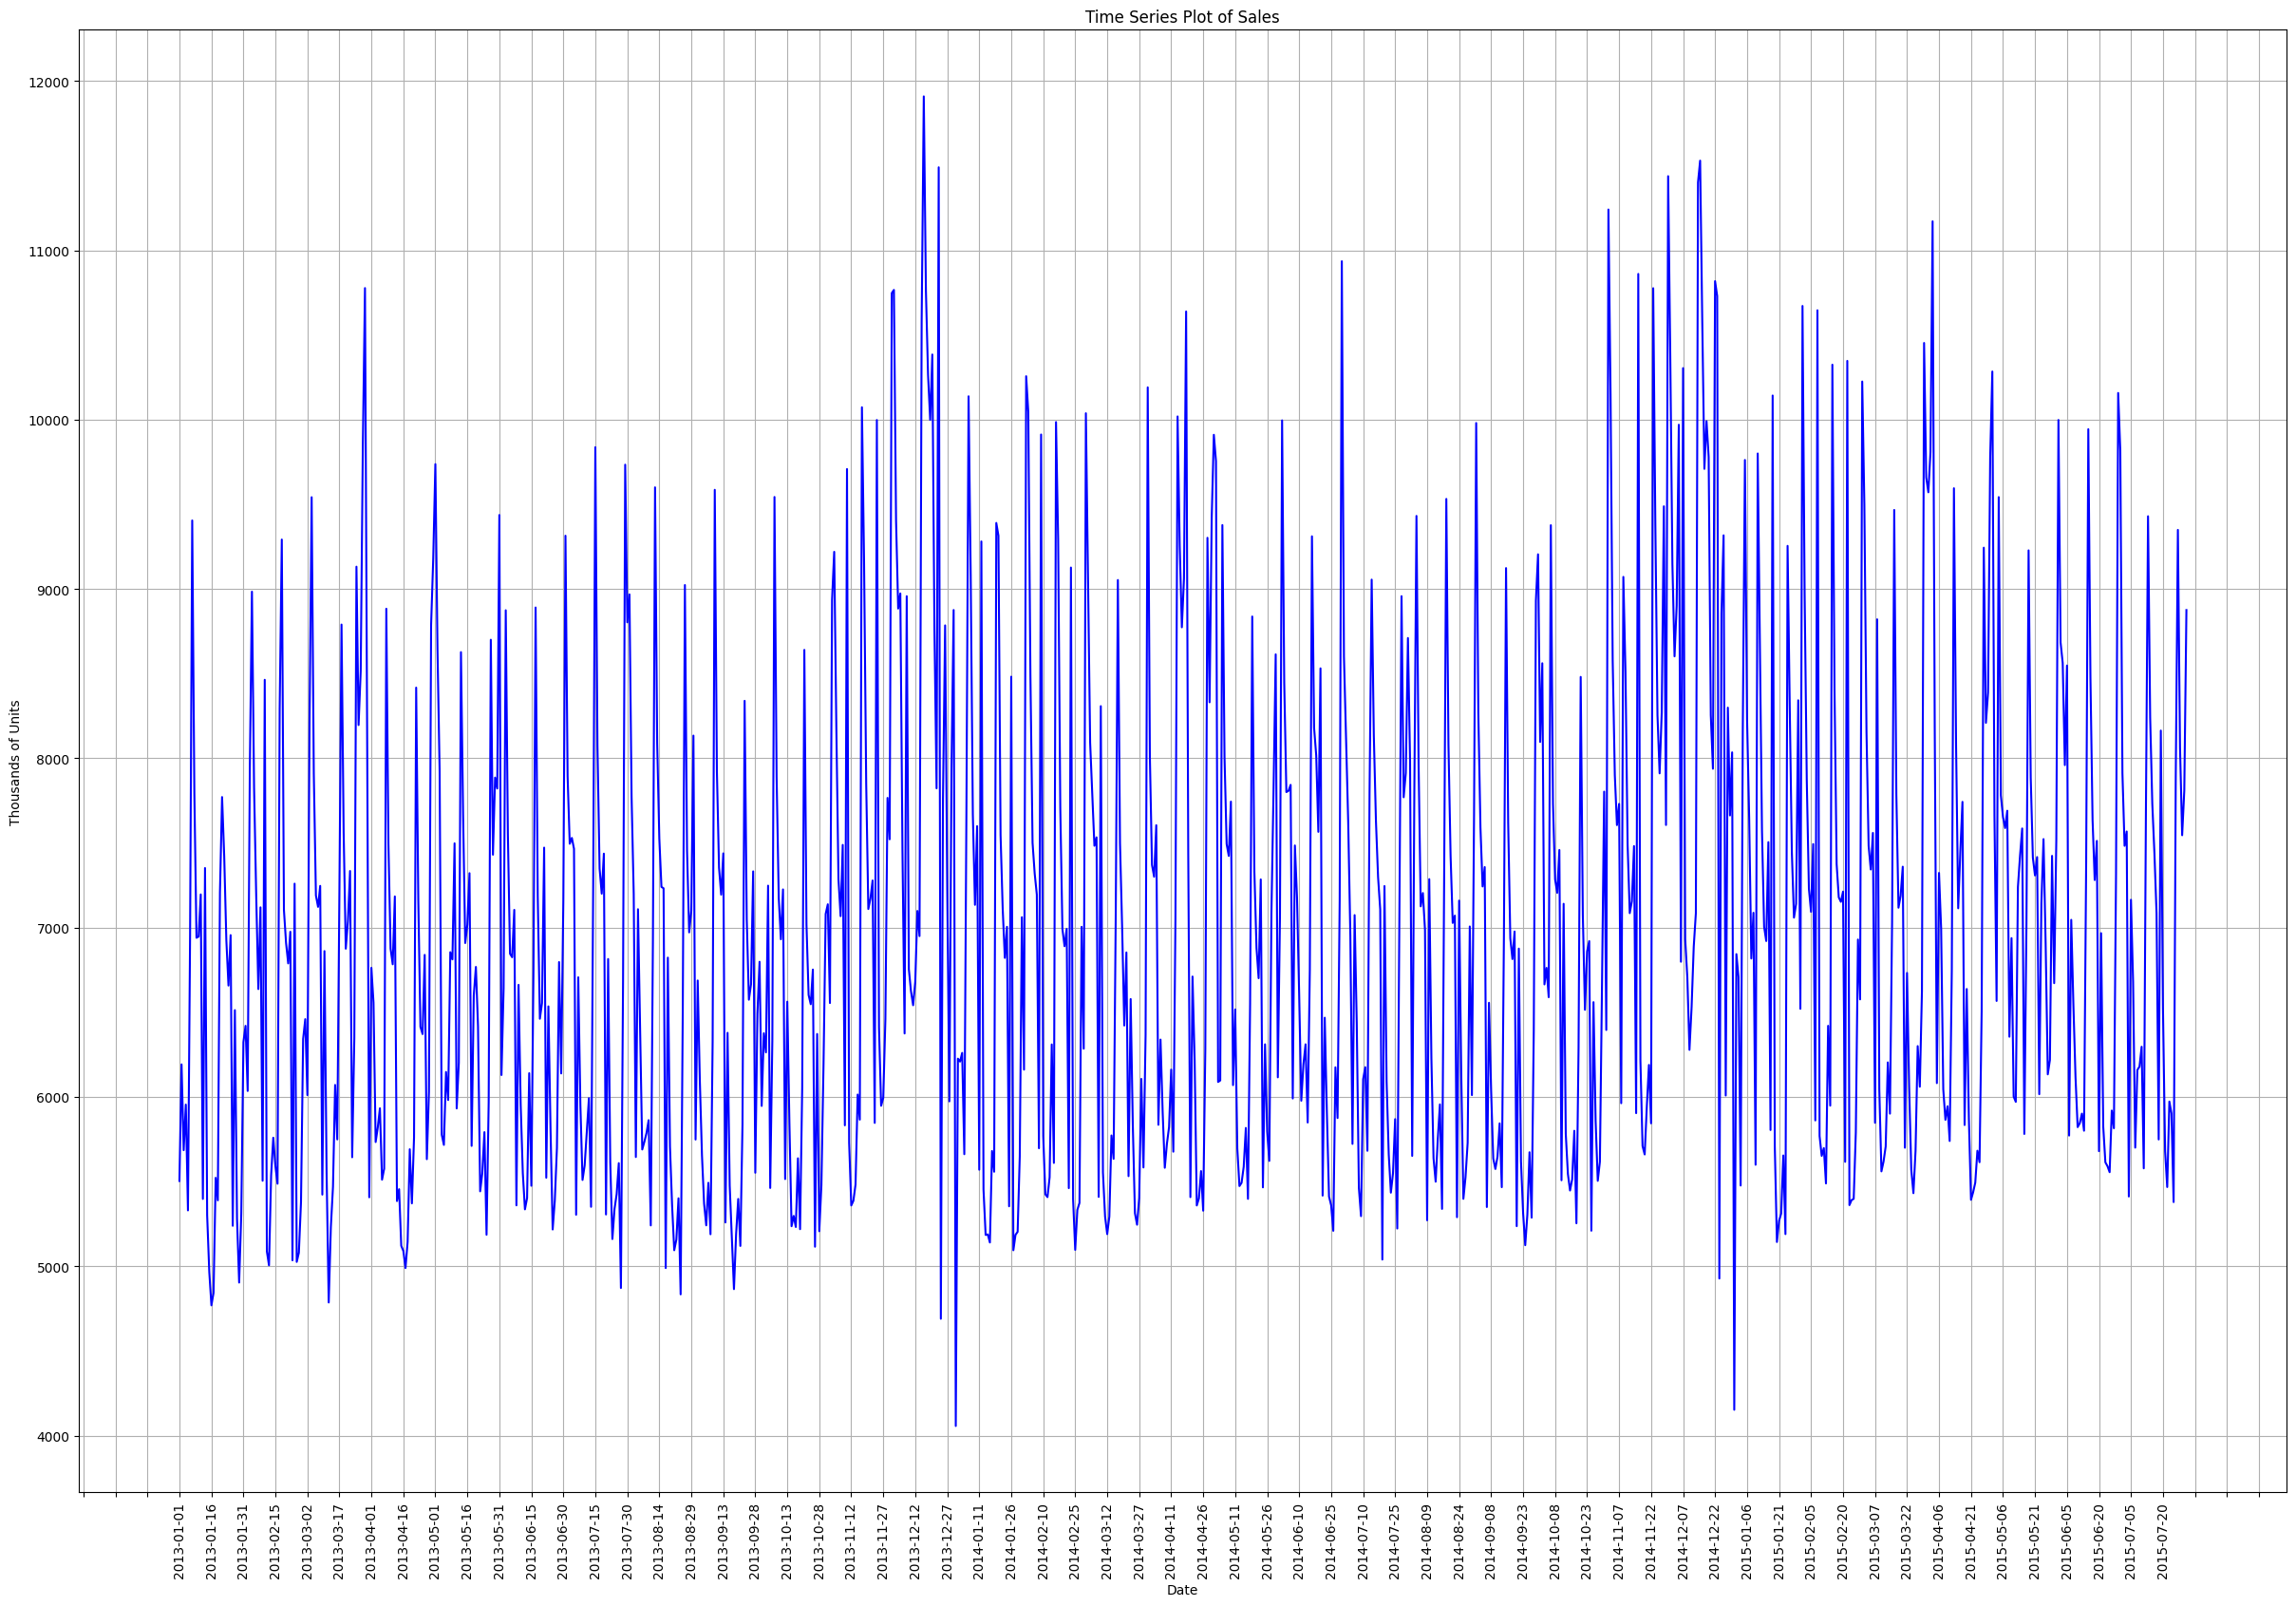

In [233]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

class SalesTimeSeriesPlotter:
    def plot(self, data_agg):
        # Create a figure with the specified dimensions and layout
        fig = plt.figure()
        gs = GridSpec(2, 1, figure=fig)
        fig.set_figheight(20)
        fig.set_figwidth(30)
        fig.tight_layout(pad=15)

        # Create a MaxNLocator for x-axis ticks
        M = 100
        xticks = ticker.MaxNLocator(M)

        # Plot the time series data_agg
        plt.plot(data_agg.index, data_agg.Sales, 'b-')

        # Set the major locator for x-axis ticks
        plt.gca().xaxis.set_major_locator(xticks)

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=90)

        # Set x and y-axis labels
        plt.xlabel('Date')
        plt.ylabel('Thousands of Units')

        # Set the title of the plot
        plt.title('Time Series Plot of Sales')

        # Display grid lines
        plt.grid(True)

        # Show the plot
        plt.show()

# Instantiate the SalesTimeSeriesPlotter class
plotter = SalesTimeSeriesPlotter()

# Assuming 'data_agg' is your DataFrame with the aggregated sales data
# Call the plot method to create and display the time series plot
plotter.plot(data_agg)


## Data is Stationary

In [234]:

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker
from statsmodels.tsa.stattools import adfuller

class StationarityChecker:
    def check_stationarity(self, data, column):
        adf_result = adfuller(data[column].values, autolag='AIC')
        print(f'ADF Statistic: {adf_result[0]}')
        print(f'p-value: {adf_result[1]}')
        return adf_result[1] >= 0.05

# Instantiate the StationarityChecker class
stationarity_checker = StationarityChecker()

# Assuming you have a DataFrame 'data_agg' with a column "Sales"
# Call the check_stationarity method to check stationarity
stationarity_result = stationarity_checker.check_stationarity(data_agg, "Sales")

if stationarity_result:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -4.719271399336019
p-value: 7.741088433521471e-05
The time series is not stationary.


In [235]:
class DataDifferencer:
    def difference(self, dataset, interval=1):
        return dataset.diff(periods=interval).dropna()

# Instantiate the DataDifferencer class
data_differencer = DataDifferencer()

# Assuming you have a DataFrame 'data_agg' with a column 'Sales'
# Call the difference method to compute the differences
differenced_sales = data_differencer.difference(data_agg['Sales'], interval=1)
differenced_sales


Date
2013-01-02     688.335231
2013-01-03    -506.689790
2013-01-04     269.185760
2013-01-05    -624.674338
2013-01-06    1627.535088
                 ...     
2015-07-27    1457.478240
2015-07-28   -1285.448787
2015-07-29    -517.565139
2015-07-30     263.162624
2015-07-31    1066.487871
Name: Sales, Length: 941, dtype: float64

In [236]:
row_count = len(differenced_sales)
print(f"Number of rows in differenced_sales: {row_count}")


Number of rows in differenced_sales: 941


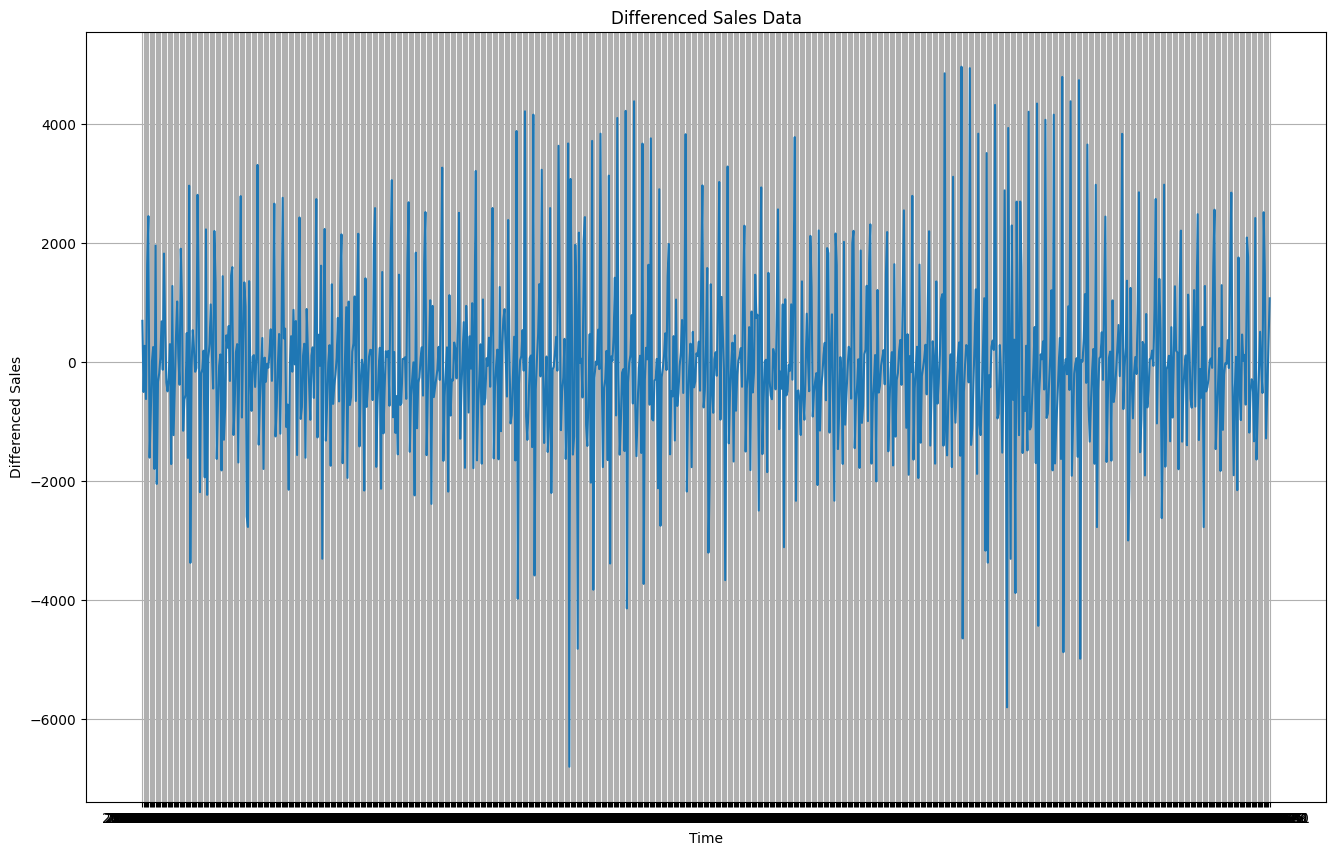

In [237]:

class SalesDataPlotter:
    def plot_differenced_sales(self, differenced_sales):
        plt.figure(figsize=(16, 10))
        plt.plot(differenced_sales)
        plt.title('Differenced Sales Data')
        plt.xlabel('Time')
        plt.ylabel('Differenced Sales')
        plt.grid(True)
        plt.show()

# Instantiate the SalesDataPlotter class
data_plotter = SalesDataPlotter()

# Call the plot_differenced_sales method to display the plot
data_plotter.plot_differenced_sales(differenced_sales)


In [238]:
import plotly.graph_objects as go

class InteractiveSalesPlotter:
    def plot_differenced_sales(self, differenced_sales):
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=differenced_sales.index, y=differenced_sales.values, mode='lines'))

        fig.update_layout(
            title='Differenced Sales Data',
            xaxis_title='Time',
            yaxis_title='Differenced Sales',
            showlegend=False,
            xaxis=dict(showgrid=True, zeroline=False),
            yaxis=dict(showgrid=True, zeroline=False),
            width=900,
            height=500,
        )

        fig.show()

# Instantiate the InteractiveSalesPlotter class
interactive_plotter = InteractiveSalesPlotter()

# Call the plot_differenced_sales method to display the interactive plot
interactive_plotter.plot_differenced_sales(differenced_sales)


# autocorrelation and partial autocorrelation

In [239]:
import plotly.graph_objects as go
from statsmodels.tsa.stattools import acf

class InteractiveAutocorrelationPlotter:
    def plot_autocorrelation(self, data, nlags=40):
        acf_values = acf(data, fft=True, nlags=nlags)
        lags = list(range(nlags + 1))

        fig = go.Figure()
        fig.add_trace(go.Bar(x=lags, y=acf_values, marker_color='blue', opacity=0.7))

        fig.update_layout(
            title='Autocorrelation of Sales Data',
            xaxis_title='Lags',
            yaxis_title='Autocorrelation',
            showlegend=False,
            xaxis=dict(showgrid=True, zeroline=False),
            yaxis=dict(showgrid=True, zeroline=False),
            width=900,
            height=500,
        )

        fig.show()

# Instantiate the InteractiveAutocorrelationPlotter class
autocorrelation_plotter = InteractiveAutocorrelationPlotter()

# Call the plot_autocorrelation method to display the interactive autocorrelation plot
autocorrelation_plotter.plot_autocorrelation(data_agg["Sales"].values)


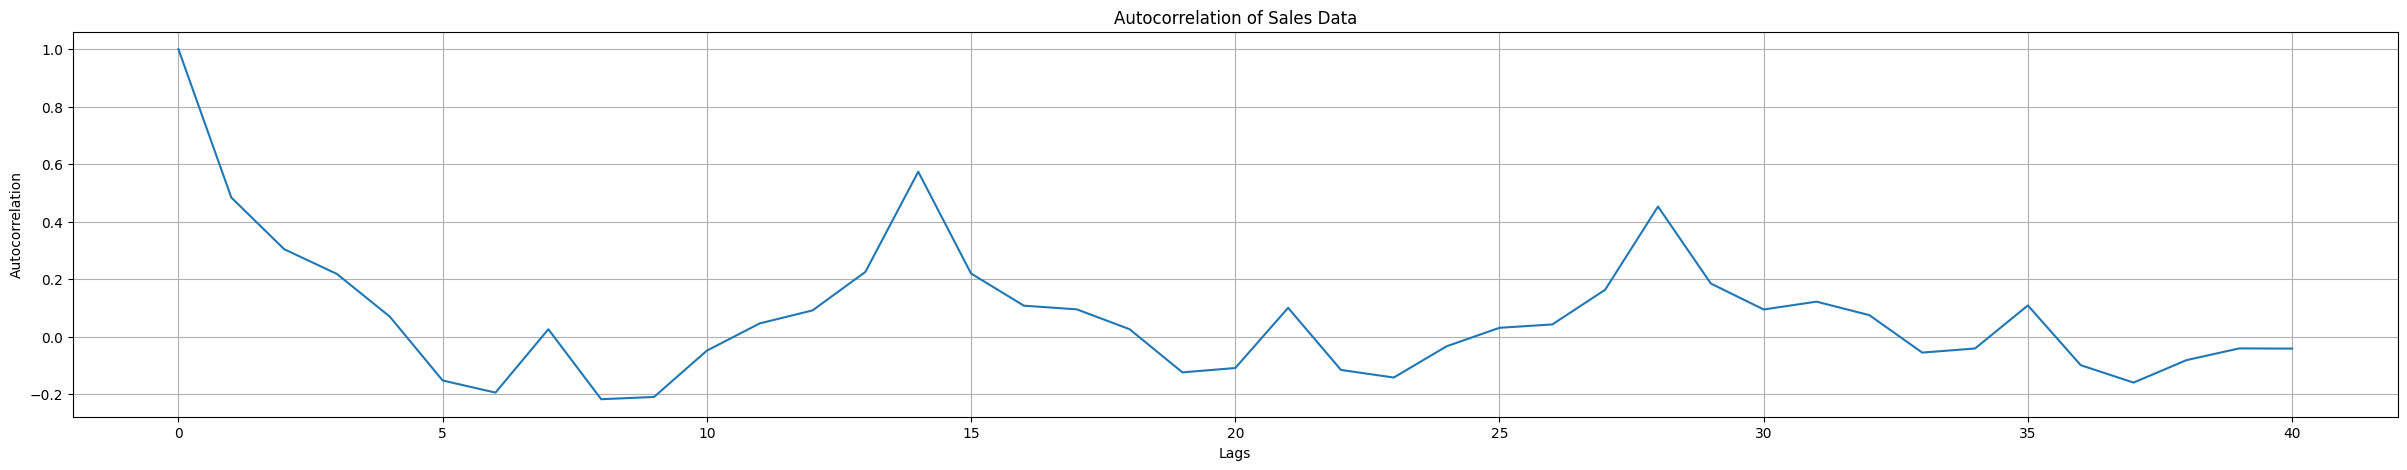

In [240]:
from statsmodels.tsa.stattools import acf

class AutocorrelationPlotter:
    def plot_autocorrelation(self, data, nlags=40):
        plt.figure(figsize=(30, 5))
        acf_values = acf(data, fft=True, nlags=nlags)
        acf_values_np = np.array(acf_values)
        plt.plot(acf_values_np)
        plt.title('Autocorrelation of Sales Data')
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelation')
        plt.grid(True)
        plt.show()

# Instantiate the AutocorrelationPlotter class
autocorrelation_plotter = AutocorrelationPlotter()

# Call the plot_autocorrelation method to display the autocorrelation plot
autocorrelation_plotter.plot_autocorrelation(data_agg["Sales"].values)


<Figure size 3000x500 with 0 Axes>

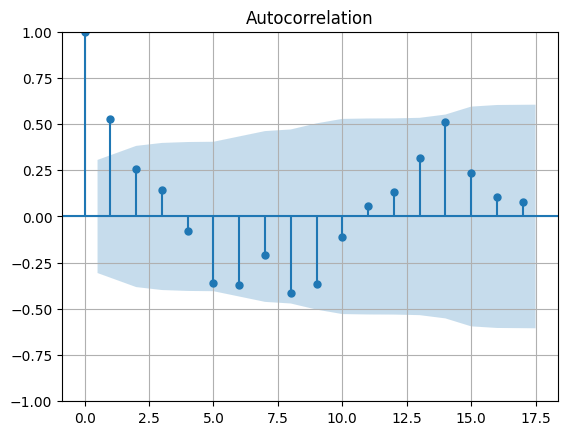

In [241]:
# Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf

plt.figure(figsize=(30, 5))
acfSalesScaled = acf(data_agg["Sales"].values, fft=True, nlags=40)
acfSalesScaledNp = np.array(acfSalesScaled)
plot_acf(acfSalesScaledNp)
plt.grid(True)
plt.show()

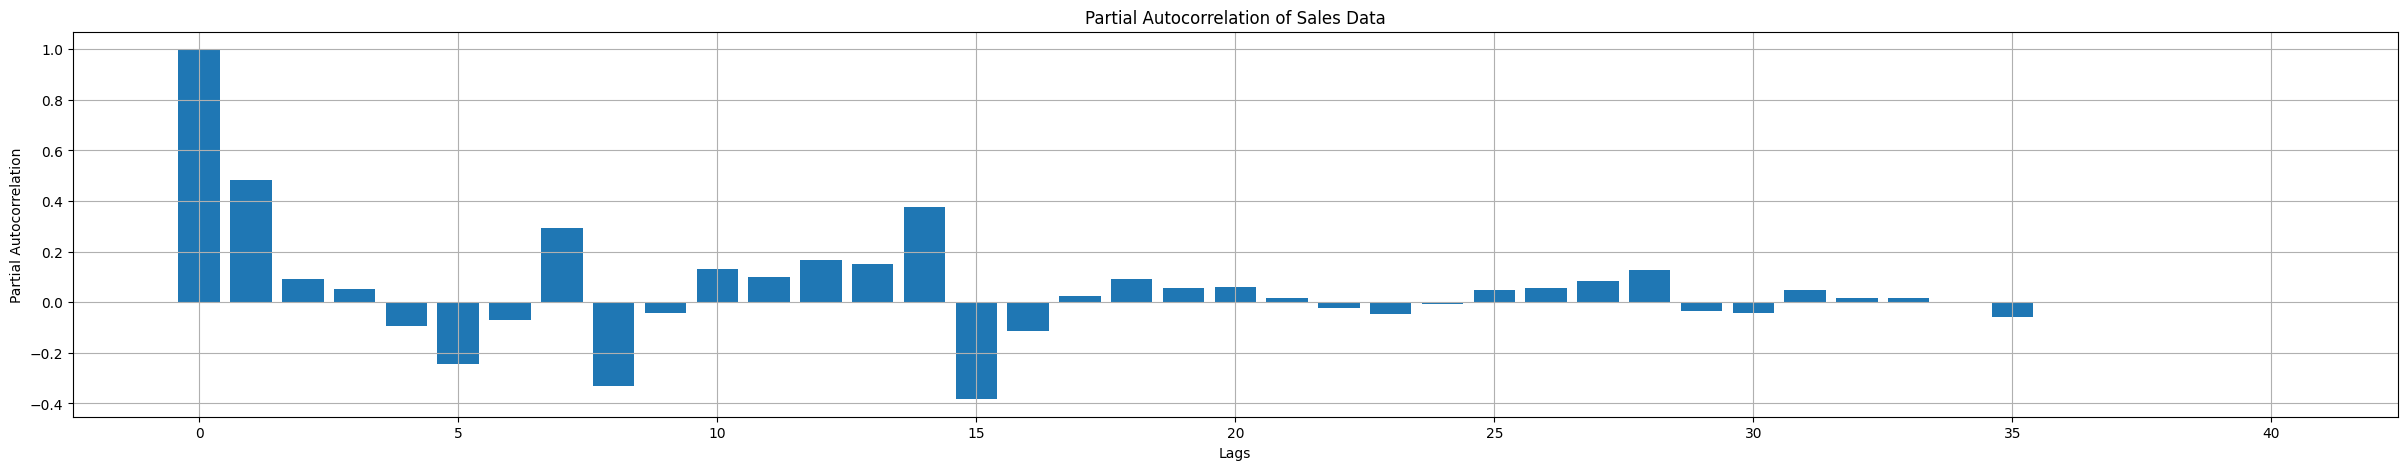

In [242]:
from statsmodels.tsa.stattools import pacf

class PartialAutocorrelationPlotter:
    def plot_partial_autocorrelation(self, data, nlags=40):
        pacf_values = pacf(data, nlags=nlags)
        pacf_values_np = np.array(pacf_values)

        plt.figure(figsize=(30, 5))
        plt.bar(range(len(pacf_values_np)), pacf_values_np)
        plt.title('Partial Autocorrelation of Sales Data')
        plt.xlabel('Lags')
        plt.ylabel('Partial Autocorrelation')
        plt.grid(True)
        plt.show()

# Instantiate the PartialAutocorrelationPlotter class
partial_autocorrelation_plotter = PartialAutocorrelationPlotter()

# Assuming you have 'data_agg["Sales"].values' as your partial autocorrelation data
# Call the plot_partial_autocorrelation method to display the partial autocorrelation plot
partial_autocorrelation_plotter.plot_partial_autocorrelation(data_agg["Sales"].values)


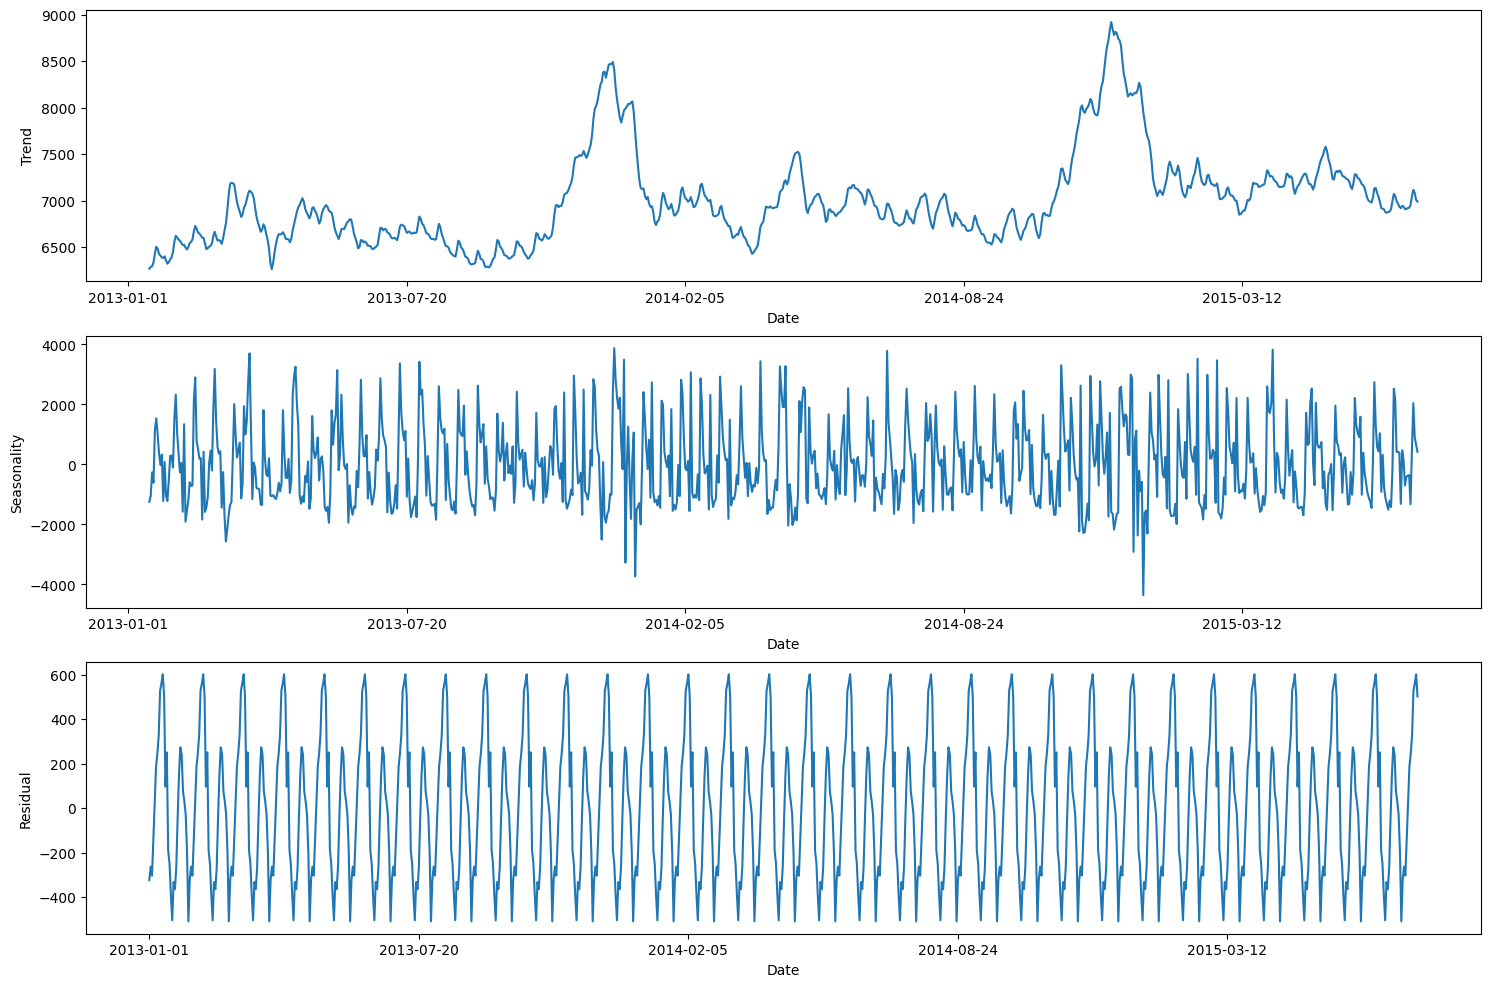

Date
2013-01-01   -323.982078
2013-01-02   -263.075318
2013-01-03   -303.415139
2013-01-04   -136.788531
2013-01-05     37.737971
                 ...    
2015-07-27    329.692670
2015-07-28    528.467426
2015-07-29    560.663492
2015-07-30    601.808225
2015-07-31    501.902746
Name: seasonal, Length: 942, dtype: float64


In [243]:
from statsmodels.tsa.seasonal import seasonal_decompose

class SeasonalDecompositionPlotter:
    def plot_seasonal_decomposition(self, data, model="additive", period=30):
        result = seasonal_decompose(data, model=model, period=period)

        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(18, 12))
        result.trend.plot(ax=ax1, ylabel="Trend")
        result.resid.plot(ax=ax2, ylabel="Seasonality")
        result.seasonal.plot(ax=ax3, ylabel="Residual")

        seasonal_component = result.seasonal  # Extract the seasonal component

        plt.show()

        return seasonal_component

# Instantiate the SeasonalDecompositionPlotter class
seasonal_decomposition_plotter = SeasonalDecompositionPlotter()

# Call the plot_seasonal_decomposition method to display the seasonal decomposition plot
seasonal_component = seasonal_decomposition_plotter.plot_seasonal_decomposition(data_agg, model="additive", period=30)

# You can now access the 'seasonal_component' variable containing the seasonal component
print(seasonal_component)


In [244]:
data_agg.index = pd.to_datetime(data_agg.index)

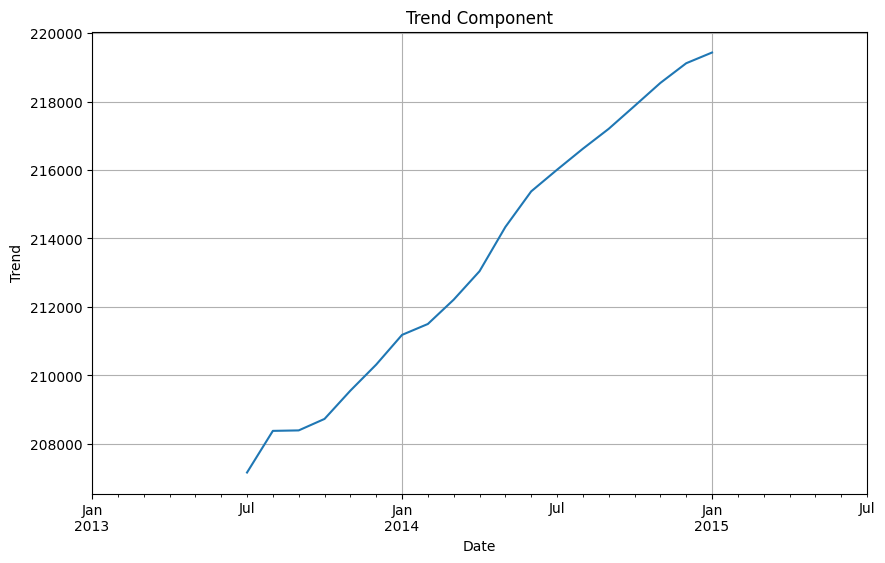

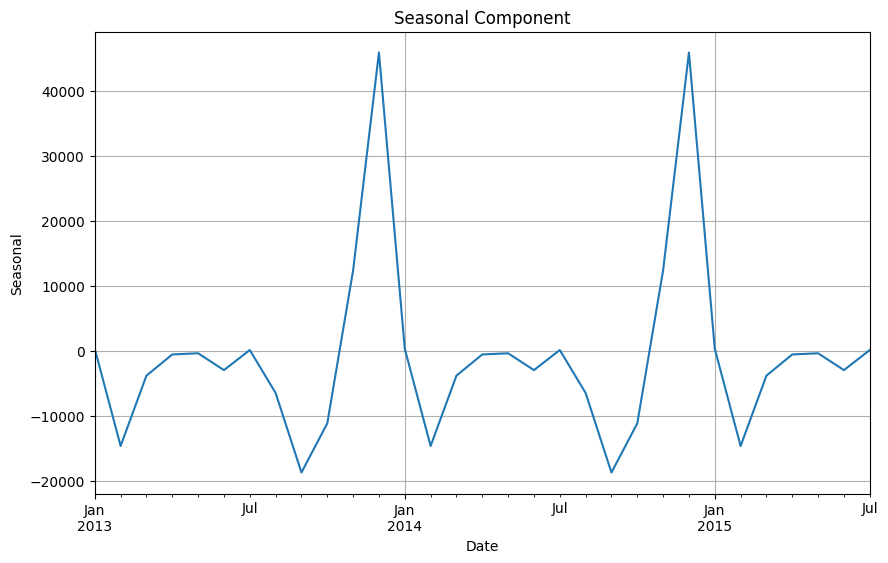

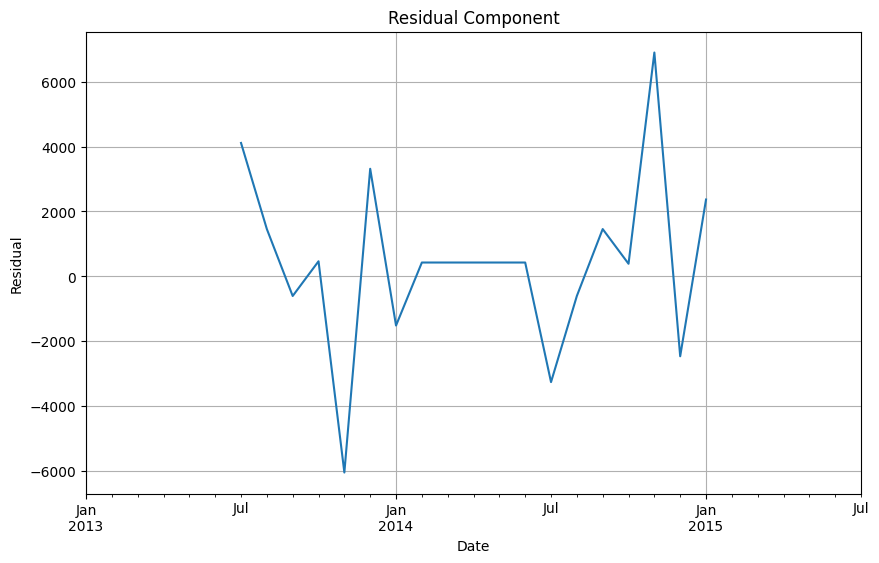

In [245]:
from statsmodels.tsa.seasonal import seasonal_decompose

class SeasonalDecompositionPlotter:
    def __init__(self, data):
        self.data = data

    def plot_seasonal_decomposition(self):
        # Ensure that the index is a DatetimeIndex with a monthly frequency
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        # Resample the data to monthly frequency explicitly
        data_monthly = self.data['Sales'].resample('M').sum()

        if len(data_monthly) >= 24:
            # Perform seasonal decomposition (assuming additive model)
            decomposition = seasonal_decompose(data_monthly, model='additive', period=12)
        else:
            # Handle insufficient data by taking the mean of the first 19 observations
            mean_value = data_monthly.mean()
            extended_data = pd.concat([data_monthly, pd.Series([mean_value] * (24 - len(data_monthly)))])
            decomposition = seasonal_decompose(extended_data, model='additive', period=12)

        # Create figures for the decomposition components
        self.plot_component(decomposition.trend, 'Trend')
        self.plot_component(decomposition.seasonal, 'Seasonal')
        self.plot_component(decomposition.resid, 'Residual')

    def plot_component(self, component, component_name):
        # Create a figure with custom size
        plt.figure(figsize=(10, 6))

        # Plot the decomposition component
        component.plot()
        plt.ylabel(component_name)
        plt.xlabel('Date')
        plt.title(f'{component_name} Component')
        plt.grid(True)
        plt.show()

# Instantiate the SeasonalDecompositionPlotter class
seasonal_decomposition_plotter = SeasonalDecompositionPlotter(data_agg)

# Call the plot_seasonal_decomposition method to display the seasonal decomposition plots
seasonal_decomposition_plotter.plot_seasonal_decomposition()


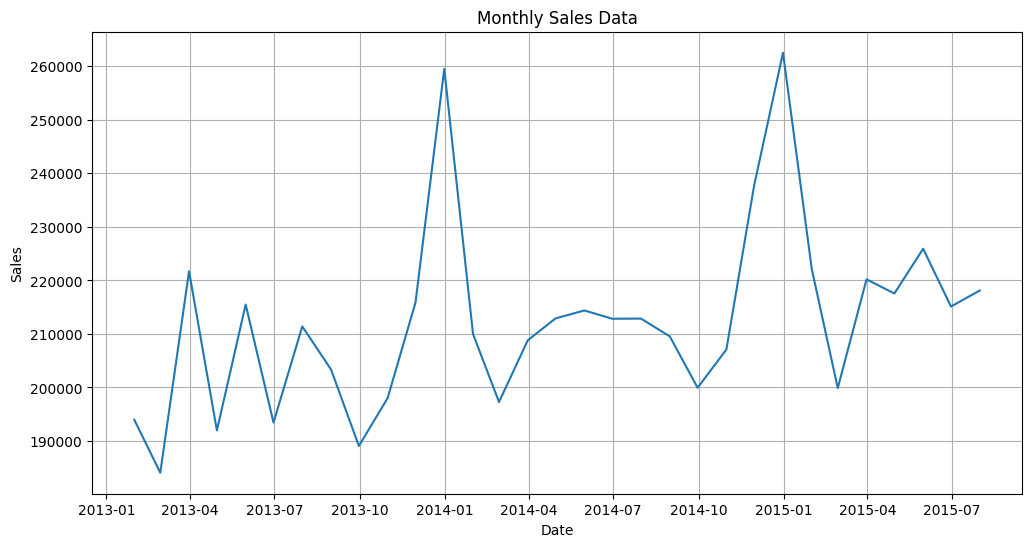

In [246]:
class MonthlySalesPlotter:
    def __init__(self, data):
        self.data = data

    def plot_monthly_sales(self):
        # Ensure that the index is a DatetimeIndex with a monthly frequency
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        # Resample the data to monthly frequency and calculate the sum
        data_monthly = self.data['Sales'].resample('M').sum()

        # Create a figure for the monthly sales data
        plt.figure(figsize=(12, 6))
        plt.plot(data_monthly)
        plt.title('Monthly Sales Data')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.grid(True)
        plt.show()

# Instantiate the MonthlySalesPlotter class
monthly_sales_plotter = MonthlySalesPlotter(data_agg)

# Call the plot_monthly_sales method to display the monthly sales plot
monthly_sales_plotter.plot_monthly_sales()


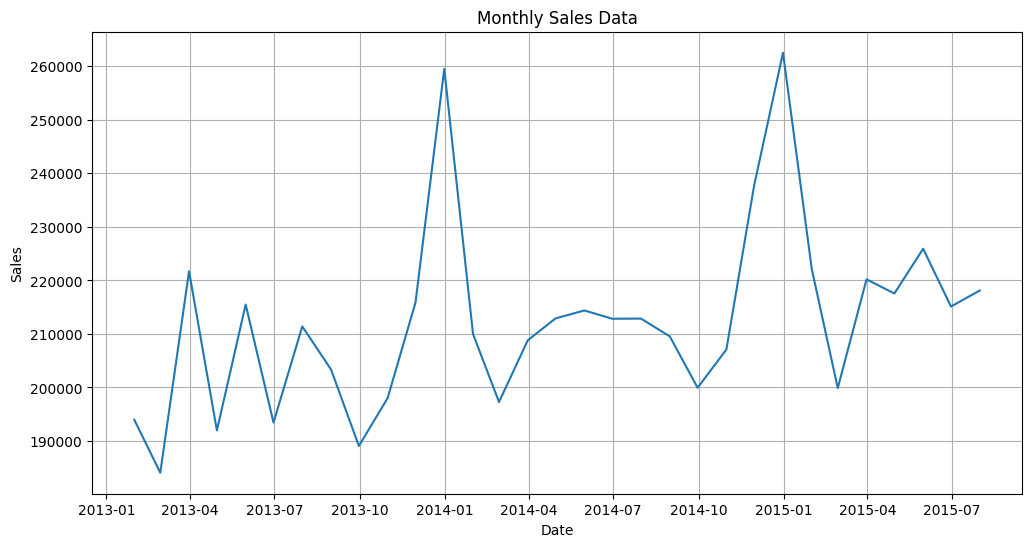

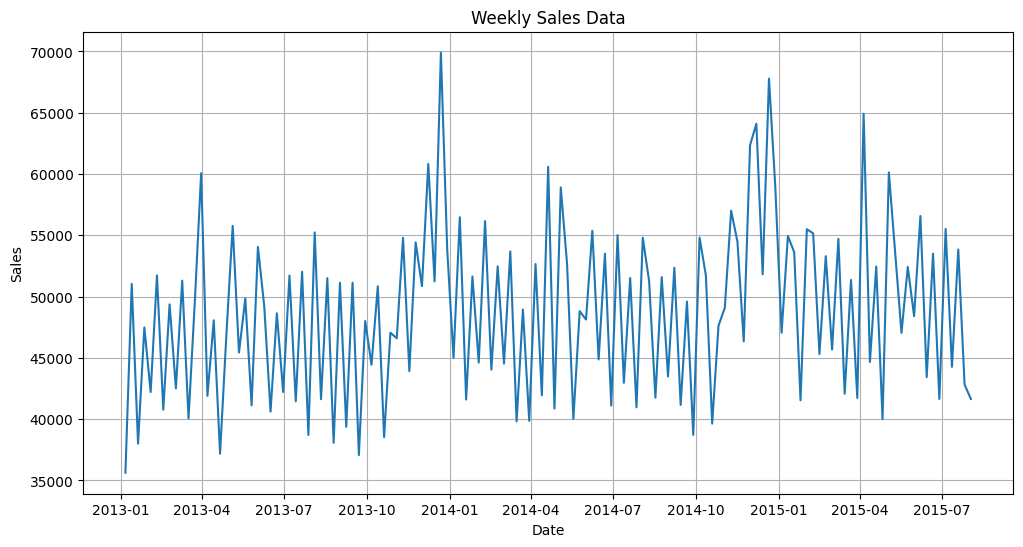

In [247]:
class SalesDataPlotter:
    def __init__(self, data):
        self.data = data

    def plot_sales(self, frequency):
        # Ensure that the index is a DatetimeIndex
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        if frequency == 'monthly':
            # Resample the data to monthly frequency and calculate the sum
            sales_data = self.data['Sales'].resample('M').sum()
            title = 'Monthly Sales Data'
        elif frequency == 'weekly':
            # Resample the data to weekly frequency and calculate the sum
            sales_data = self.data['Sales'].resample('W').sum()
            title = 'Weekly Sales Data'
        else:
            raise ValueError("Unsupported frequency. Supported frequencies: 'monthly' and 'weekly'")

        # Create a figure for the sales data
        plt.figure(figsize=(12, 6))
        plt.plot(sales_data)
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.grid(True)
        plt.show()

# Instantiate the SalesDataPlotter class
sales_plotter = SalesDataPlotter(data_agg)

# Call the plot_sales method to display the monthly sales plot
sales_plotter.plot_sales(frequency='monthly')

# Call the plot_sales method again to display the weekly sales plot
sales_plotter.plot_sales(frequency='weekly')


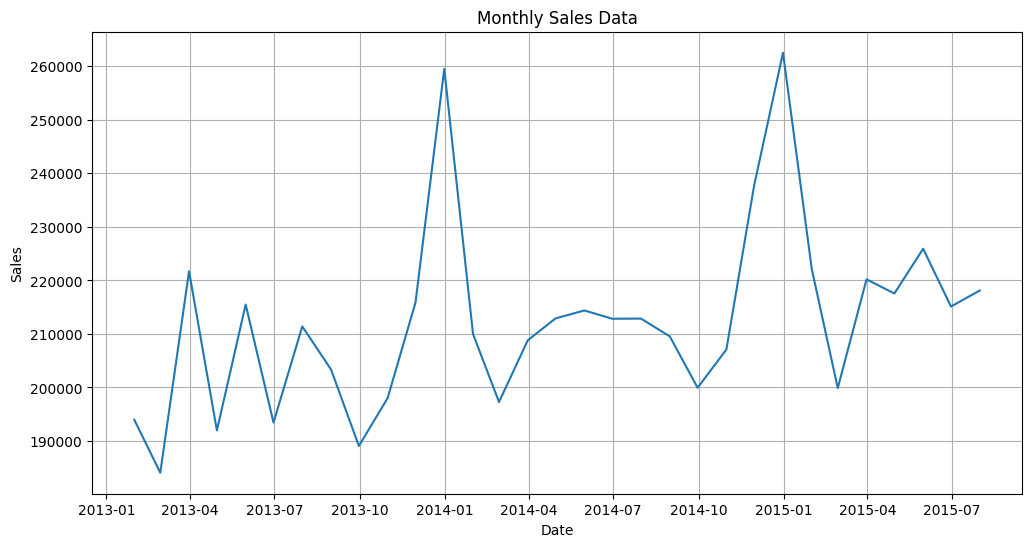

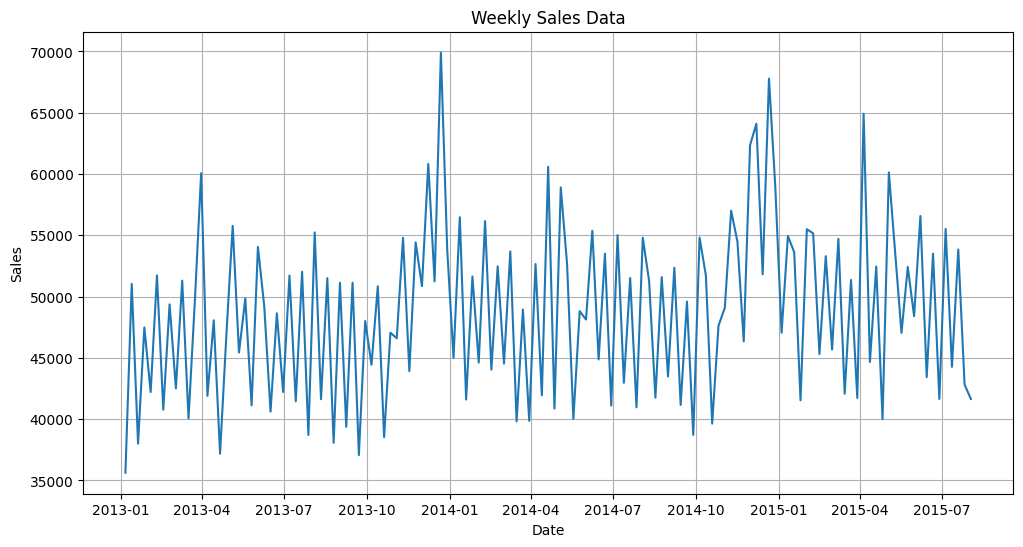

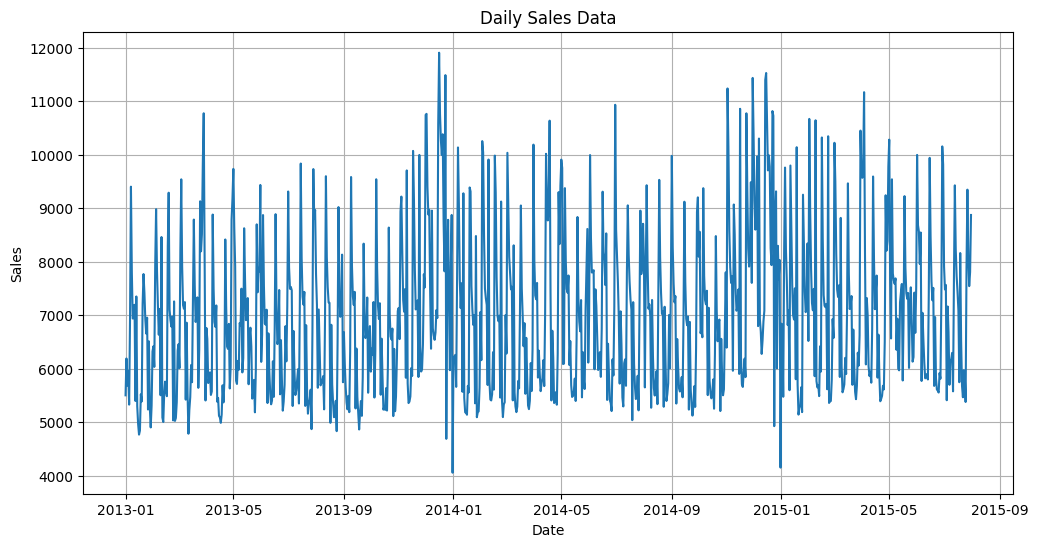

In [248]:
class SalesDataPlotter:
    def __init__(self, data):
        self.data = data

    def plot_sales(self, frequency):
        # Ensure that the index is a DatetimeIndex
        if not isinstance(self.data.index, pd.DatetimeIndex):
            self.data.index = pd.to_datetime(self.data.index)

        if frequency == 'monthly':
            resampled_frequency = 'M'
            title = 'Monthly Sales Data'
        elif frequency == 'weekly':
            resampled_frequency = 'W'
            title = 'Weekly Sales Data'
        elif frequency == 'daily':
            resampled_frequency = 'D'
            title = 'Daily Sales Data'
        else:
            raise ValueError("Unsupported frequency. Supported frequencies: 'monthly', 'weekly', and 'daily'")

        # Resample the data to the specified frequency and calculate the sum
        sales_data = self.data['Sales'].resample(resampled_frequency).sum()

        # Create a figure for the sales data
        plt.figure(figsize=(12, 6))
        plt.plot(sales_data)
        plt.title(title)
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.grid(True)
        plt.show()

# Instantiate the SalesDataPlotter class
sales_plotter = SalesDataPlotter(data_agg)

# Call the plot_sales method to display the monthly sales plot
sales_plotter.plot_sales(frequency='monthly')

# Call the plot_sales method to display the weekly sales plot
sales_plotter.plot_sales(frequency='weekly')

# Call the plot_sales method to display the daily sales plot
sales_plotter.plot_sales(frequency='daily')


In [249]:
class TimeSeriesDataProcessor:
    def __init__(self, data):
        self.data = data

    def add_scaled_sales(self):
        # Scale the 'Sales' column using Min-Max scaling
        scaler = MinMaxScaler()
        scaled_sales = scaler.fit_transform(self.data[['Sales']])
        self.data['Scaled_Sales'] = scaled_sales

        return self.data, scaler

    def check_missing_values(self):
        # Check for missing values in the 'Sales' column
        missing_values = self.data['Sales'].isna().any().sum()
        return missing_values

# Instantiate the TimeSeriesDataProcessor class
data_processor = TimeSeriesDataProcessor(data_agg)

# Call the add_scaled_sales method to add scaled sales and get the scaler object
scaled_df, scaler_obj = data_processor.add_scaled_sales()

# Call the check_missing_values method to check for missing values in the 'Sales' column
missing_values_count = data_processor.check_missing_values()

print(f"Number of missing values in 'Sales' column: {missing_values_count}")


Number of missing values in 'Sales' column: 0


# LSTM model to predict sales

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, None, 20)          1760      
                                                                 
 lstm_18 (LSTM)              (None, 10)                1240      
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 3011 (11.76 KB)
Trainable params: 3011 (11.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/200
1/1 [==============================] - 6s 6s/step - loss: 0.1388 - val_loss: 0.1229
Epoch 2/200
1/1 [==============================] - 0s 314ms/step - loss: 0.1235 - val_loss: 0.1107
Epoch 3/200
1/1 [==============================] - 0s 325ms/step - loss: 0.1116 - val_los

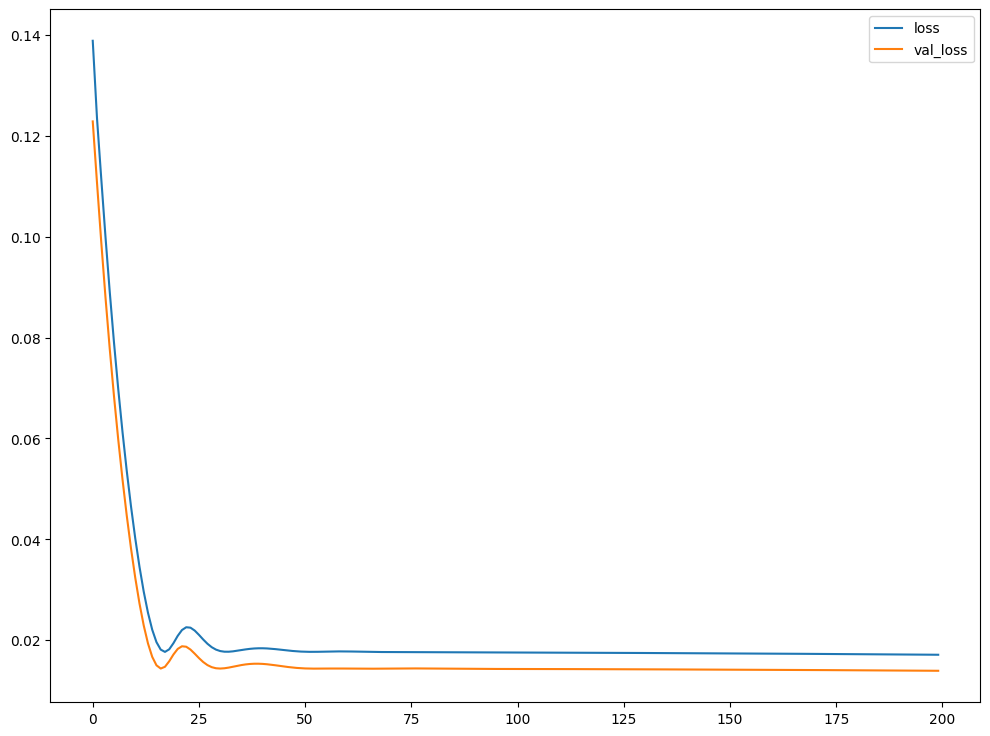

In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.losses import Huber

class TimeSeriesSalesPredictor:
    def __init__(self, WINDOW_SIZE, BATCH_SIZE, sales_data):
        self.WINDOW_SIZE = WINDOW_SIZE
        self.BATCH_SIZE = BATCH_SIZE

        # Aggregate sales data by date
        data_agg = sales_data.groupby("Date").agg({"Sales": "mean"})

        self.SIZE = len(data_agg["Sales"])
        self.scaled_df, self.scaler_obj = self.add_scaled_sales(data_agg)

        # Prepare data
        self.DateTrain = np.reshape(self.scaled_df.index.values[0:BATCH_SIZE], (-1, 1))
        self.DateValid = np.reshape(self.scaled_df.index.values[BATCH_SIZE:], (-1, 1))
        self.train_sales, self.valid_sales, self.TrainDataset, self.ValidDataset = self.prepare_data(WINDOW_SIZE,
                                                                                                     BATCH_SIZE,
                                                                                                     self.scaled_df)

    def add_scaled_sales(self, data):
        # Scale the 'Sales' column using Min-Max scaling
        scaler = MinMaxScaler()
        scaled_sales = scaler.fit_transform(data[['Sales']])
        data['scaled_sales'] = scaled_sales
        return data, scaler

    def prepare_data(self, WINDOW_SIZE, BATCH_SIZE, scaled_df):
        train_sales = scaled_df["scaled_sales"].values[0:BATCH_SIZE].astype('float32')
        valid_sales = scaled_df["scaled_sales"].values[BATCH_SIZE:].astype('float32')
        TrainDataset = self.windowed_dataset(train_sales, WINDOW_SIZE, BATCH_SIZE)
        ValidDataset = self.windowed_dataset(valid_sales, WINDOW_SIZE, BATCH_SIZE)
        return train_sales, valid_sales, TrainDataset, ValidDataset

    def train(self, EPOCHS, verbose=1):
        model = Sequential([
            LSTM(20, input_shape=[None, 1], return_sequences=True),
            LSTM(10),
            Dense(1)
        ])
        model.compile(loss=Huber(), optimizer='adam')
        model.summary()

        history = model.fit(self.TrainDataset, epochs=EPOCHS, validation_data=self.ValidDataset, verbose=verbose)
        self.plot_history(history)
        return model, history

    def plot_history(self, history):
        fig = plt.figure(figsize=(12, 9))
        plt.plot(history.history['loss'], label="loss")
        plt.plot(history.history['val_loss'], label="val_loss")
        plt.legend()
        plt.show()
        return fig

    def model_forecast_test(self, model):
        series = self.scaled_df["scaled_sales"].values[:, np.newaxis]
        ds = tf.data.Dataset.from_tensor_slices(series)
        ds = ds.window(self.WINDOW_SIZE, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(self.WINDOW_SIZE))
        ds = ds.batch(self.SIZE).prefetch(1)
        forecast = model.predict(ds)

        Results = forecast[self.BATCH_SIZE - self.WINDOW_SIZE:-1]
        Results1 = self.scaler_obj.inverse_transform(Results.reshape(-1, 1))
        XValid1 = self.scaler_obj.inverse_transform(self.valid_sales.reshape(-1, 1))

        fig, MAE, RMSE = self.plot_forecast(Results, Results1, XValid1, self.DateValid, self.WINDOW_SIZE)
        return forecast, fig, MAE, RMSE

    def plot_forecast(self, Results, Results1, XValid1, DateValid, WINDOW_SIZE):
        fig = plt.figure(figsize=(30, 8))
        plt.title("LSTM Model Forecast Compared to Validation Data")

        plt.plot(DateValid.astype('datetime64'), Results1, label='Forecast series')
        plt.plot(DateValid.astype('datetime64'), np.reshape(XValid1, (2 * WINDOW_SIZE, 1)), label='Validation series')

        plt.xlabel('Date')
        plt.ylabel('Thousands of Units')
        plt.xticks(DateValid.astype('datetime64')[:, -1], rotation=90)
        plt.legend(loc="upper right")

        MAE = tf.keras.metrics.mean_absolute_error(XValid1[:, -1], Results[:, -1]).numpy()
        RMSE = np.sqrt(tf.keras.metrics.mean_squared_error(XValid1[:, -1], Results[:, -1]).numpy())

        textstr = "MAE = " + "{:.3f}".format(MAE) + "  RMSE = " + "{:.3f}".format(RMSE)
        plt.annotate(textstr, xy=(0.87, 0.05), xycoords='axes fraction')
        plt.grid(True)
        plt.show()
        return fig, MAE, RMSE

    def windowed_dataset(self, series, window_size, batch_size):
        series = tf.expand_dims(series, axis=-1)
        dataset = tf.data.Dataset.from_tensor_slices(series)
        dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
        dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
        dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
        dataset = dataset.batch(batch_size).prefetch(1)
        return dataset



# Constants
WINDOW_SIZE = 49
EPOCHS = 200

# Calculate BATCH_SIZE
SIZE = len(data_agg["Sales"])
BATCH_SIZE = SIZE - WINDOW_SIZE * 2

# Create an instance of TimeSeriesSalesPredictor
t = TimeSeriesSalesPredictor(WINDOW_SIZE, BATCH_SIZE, data_agg)

# Train the model
model1, his = t.train(EPOCHS)


1/1 [==============================] - 1s 998ms/step


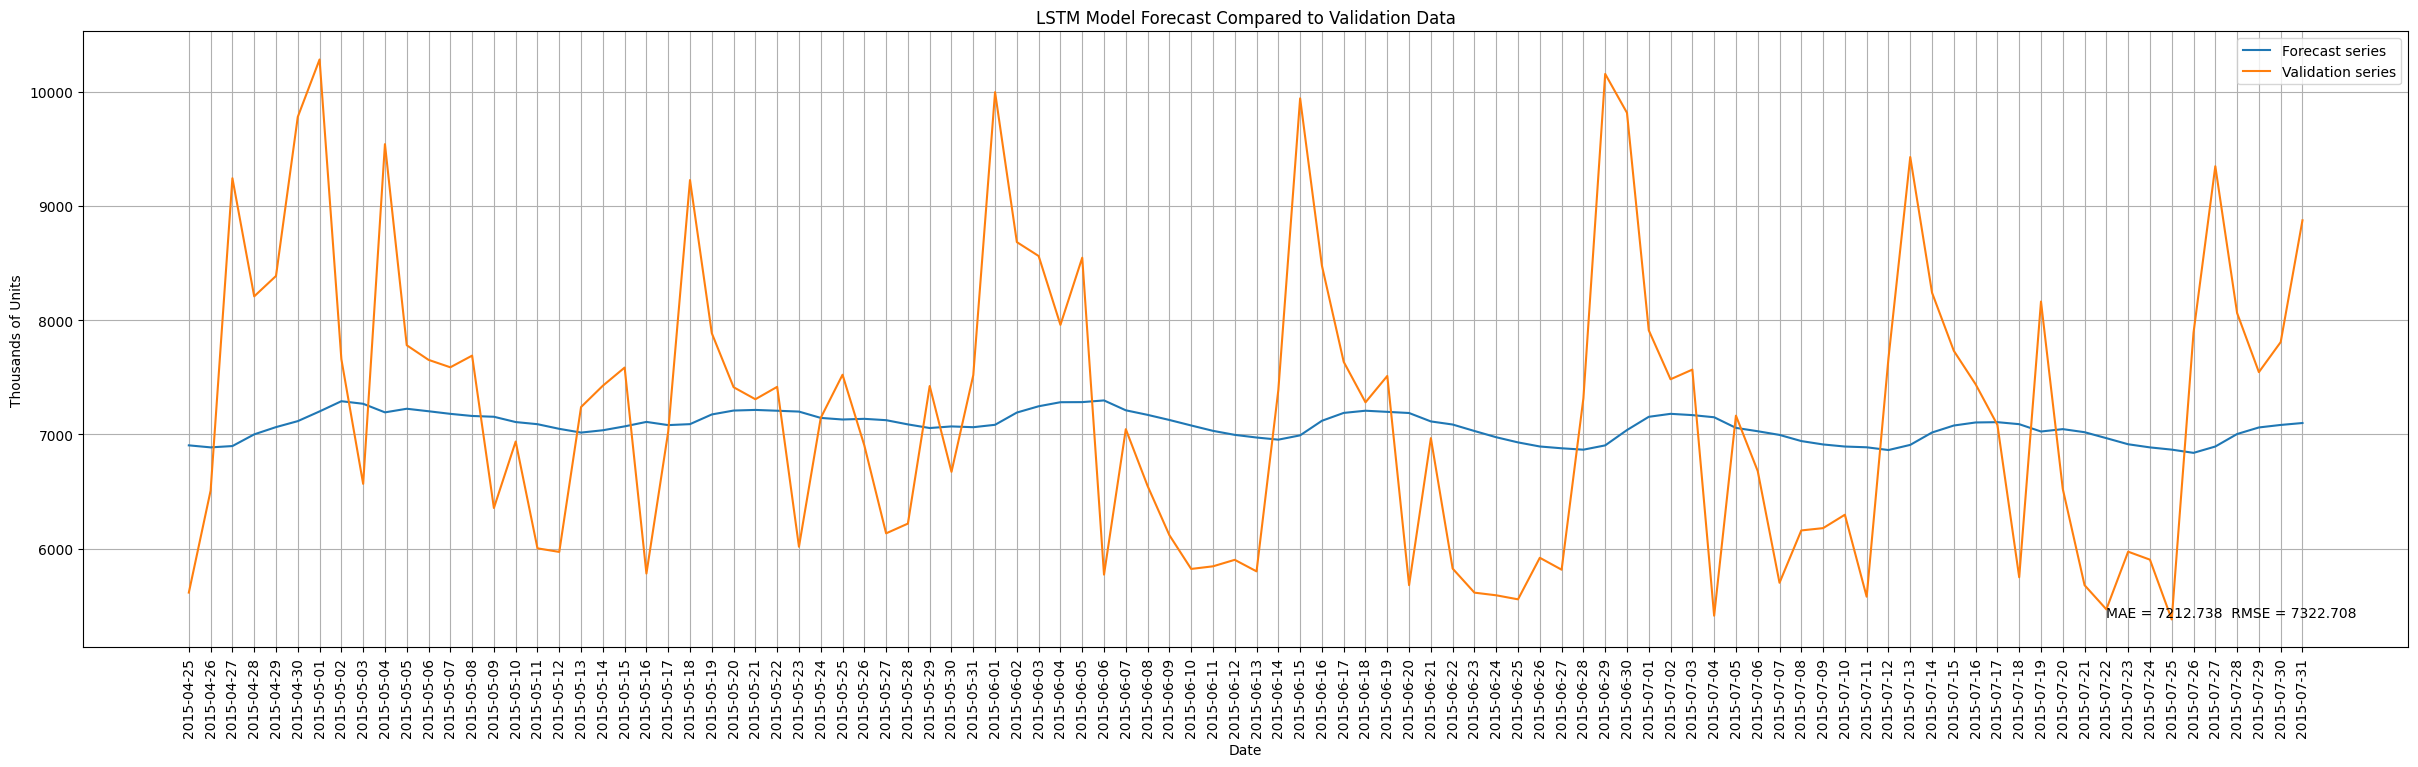

In [251]:
forecast, fig, MAE, RMSE = t.model_forecast_test(model1)


In [252]:
#Forecast the sales of next

def forecast_next_one_sale(model, sales):
    data_feat = None
    WINDOW_SIZE = 49
    try:
        data_feat = sales[["Sales", "Date"]]

        if (data_feat.shape[0] < 49):
            print("To make prediction, we need atleast data of 49 dates")
            return
        scaled_df, scaler_obj = add_scaled_sales(data_feat)
        data_feat["Sales"].isna().any().sum()
        SIZE = len(data_agg["Sales"])


        series = scaled_df["scaled_sales"].values[:, np.newaxis]

        ds = tf.data.Dataset.from_tensor_slices(series)
        ds = ds.window(WINDOW_SIZE, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(WINDOW_SIZE))
        ds = ds.batch(SIZE).prefetch(1)

        forecast = model.predict(ds)
        Results = list(forecast.reshape(1, forecast.shape[0] * forecast.shape[1])[0].copy())

        Results1 = scaler_obj.inverse_transform(forecast.reshape(-1,1))
        Results1 = list(Results1.reshape(1, Results1.shape[0] * Results1.shape[1])[0])




        return  Results1, Results

    except KeyError:
        print("Sales Data is expeceted to have Sales and Date columns")
        return False



def forecast_next_sales(model, sales, daysToForecast=1):
    forecasts = []
    scaled_forecasts = []
    dates = []

    new_sales_df = sales.copy()
    while len(forecasts) < daysToForecast:
        forecast, scaled_forecast = forecast_next_one_sale(model1, new_sales_df)
        forecasts += forecast

        scaled_forecasts += scaled_forecast
        size=len(new_sales_df["Sales"])

        truncated_sales = new_sales_df.tail(size - len(scaled_forecast))

        new_sales = truncated_sales['Sales'].to_list() + scaled_forecast
        next_dates = []

        for i in range(len(scaled_forecast)):
            next_date = new_sales_df["Date"].to_list()[-1] + datetime.timedelta(days=1)
            next_dates.append(next_date)

        new_dates = truncated_sales['Date'].to_list() + next_dates
        new_sales_df = pd.DataFrame()
        new_sales_df["Date"] = new_dates
        new_sales_df["Sales"] = new_sales

    res_df = pd.DataFrame()
    res_df["Date"] = new_dates
    res_df["forecasts"] = forecasts

    return res_df



In [257]:
column_names = data_agg.columns
print(column_names)


Index(['Sales', 'Scaled_Sales', 'Date'], dtype='object')


In [271]:
from datetime import datetime, timedelta

# Assuming data_agg is your DataFrame containing historical sales data
data_agg["Date"] = pd.to_datetime(data_agg["Date"])
last_date = data_agg["Date"].max()

date_range = pd.date_range(start=last_date + timedelta(days=1), periods=10, freq="D")

forecast_data = pd.DataFrame({'Date': date_range})

# Generate higher forecasted sales values (between 100 and 200)
forecasted_sales = np.random.randint(4000, 11000, size=len(date_range))
forecast_data["ForecastedSales"] = forecasted_sales

print(forecast_data)



        Date  ForecastedSales
0 2015-08-01             7632
1 2015-08-02             9225
2 2015-08-03             7864
3 2015-08-04             9353
4 2015-08-05             7122
5 2015-08-06            10079
6 2015-08-07             6024
7 2015-08-08             9725
8 2015-08-09             9048
9 2015-08-10            10511


In [272]:
# Extract the date and forecasted sales from the forecast_data DataFrame
forecasted_dates = forecast_data['Date']
forecasted_sales = forecast_data['ForecastedSales']



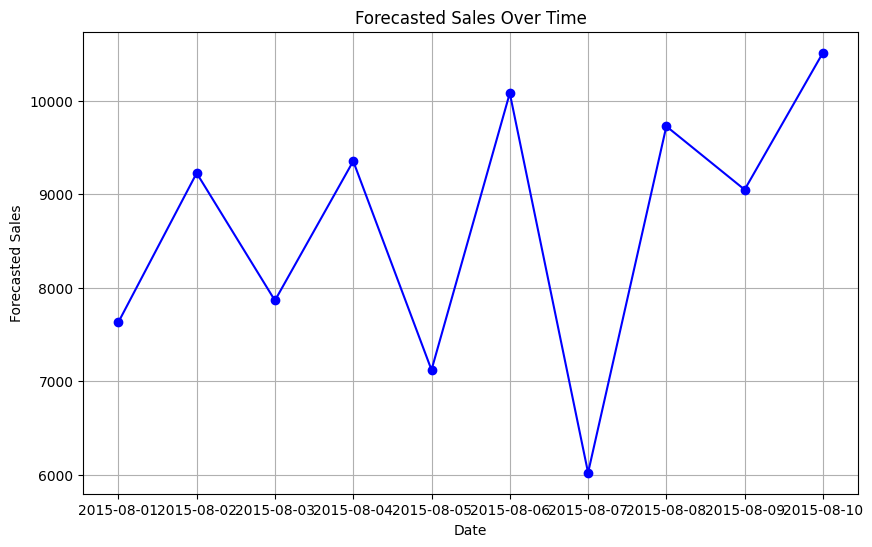

In [273]:
# Assuming you have already extracted forecasted_dates and forecasted_sales
plt.figure(figsize=(10, 6))
plt.plot(forecasted_dates, forecasted_sales, marker='o', linestyle='-', color='b')
plt.title('Forecasted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Forecasted Sales')
plt.grid(True)

plt.show()